# Library

In [1]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

# Load Data

In [3]:
drive.mount('/content/drive')

url = 'https://drive.google.com/file/d/1pYKlC7CXx4NnIHwb2sjL5CUmgaCOxBwP/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

Mounted at /content/drive


,Id,Sentiment,Instagram Comment Text
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...


In [4]:
df.shape

(400, 3)

In [5]:
df.dtypes

Id                         int64
Sentiment                 object
Instagram Comment Text    object
dtype: object

In [6]:
df.isnull().sum()

Id                        0
Sentiment                 0
Instagram Comment Text    0
dtype: int64

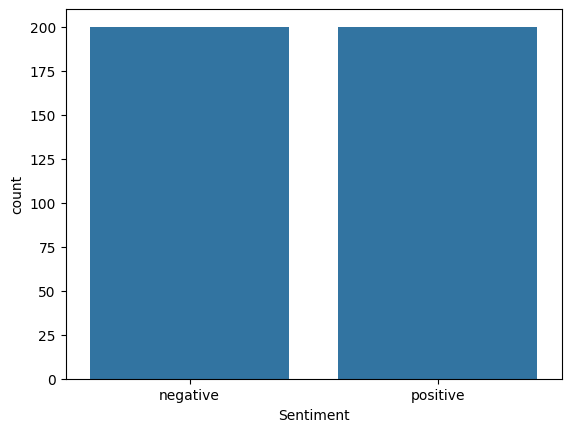

In [7]:
sns.countplot(x ='Sentiment',data=df)
plt.show()

# Preprocessing Text

In [8]:
clean_comments = []
for comment in df["Instagram Comment Text"]:
    def hapus_tanda(comment):
        tanda_baca = set(string.punctuation)
        comment = ''.join(ch for ch in comment if ch not in tanda_baca)
        return comment

    comment=comment.lower()
    comment = re.sub(r'\\u\w\w\w\w', '', comment)
    comment=re.sub(r'http\S+','',comment)
    #hapus @username
    comment=re.sub('@[^\s]+','',comment)
    #hapus #tagger
    comment = re.sub(r'#([^\s]+)', r'\1', comment)
    #hapus tanda baca
    comment=hapus_tanda(comment)
    #hapus angka dan angka yang berada dalam string
    comment=re.sub(r'\w*\d\w*', '',comment).strip()

    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    comment = stemmer.stem(comment)
    clean_comments.append(comment)

df['clean'] = clean_comments


In [9]:
df

,Id,Sentiment,Instagram Comment Text,clean
0,1,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...,username tolol gak ada hubung nya gugur dgn pa...
1,2,negative,Geblek lo tata...cowo bgt dibela2in balikan......,geblek lo tatacowo bgt balikanhadewwntar tingg...
2,3,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...,kmrn skr lengket lg duhhh kok labil bgt sih mb...
3,4,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ...",inti kalau kesel dengan att nya gausah ke anak...
4,5,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha...",hadewwwww permpuan itu lgsakit jiwaknp harus d...
...,...,...,...,...
395,396,positive,Bangga sama suami yg selalu ingat istri disela...,bangga sama suami yg selalu ingat istri sela w...
396,397,positive,Apaoun pekerjaannya yg penting halal u tuk men...,apaoun kerja yg penting halal u tuk nafkah kel...
397,398,positive,Gojek itu mayoritas pegangguran yang lama gak ...,gojek itu mayoritas pegangguran yang lama gak ...
398,399,positive,<USERNAME> aslinya cantik dan ayu loh mbak kr...,username asli cantik dan ayu loh mbak krn aku ...


# Feature Extraction

In [10]:
# Create feature vectors
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean']).toarray()
y = df["Sentiment"]

In [11]:
print(X.shape)
print(y.shape)

(400, 2733)
(400,)


# Splitting Data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape , y_test.shape

((320, 2733), (80,))

# Naive Bayes Model

In [13]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)

GaussianNB()

# Evaluasi Model

In [14]:
y_pred = nbModel.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.78      0.81        46
    positive       0.73      0.79      0.76        34

    accuracy                           0.79        80
   macro avg       0.78      0.79      0.78        80
weighted avg       0.79      0.79      0.79        80



In [15]:
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

0.7834695160276556
0.7883631713554987
0.784776072163317


In [22]:
#prediksi dengan teks diluar dataset
new_string = "orang itu ternyata sangat bodoh"
s = [new_string]
new_X_test = vectorizer.transform(s).toarray()
pred = nbModel.predict(new_X_test)
print(f"kalimat ({new_string}), bermuatan {pred[0]}")

kalimat (orang itu ternyata sangat bodoh), bermuatan negative
